In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

In [12]:
# Load the CSV file
file_path = 'C:/Users/Cyber/Downloads/ecommerce_customer_data.csv'
data = pd.read_csv(file_path)

data.head()

,Unnamed: 0,UserID,TotalAmount,AvgAmount,MaxAmount,MinAmount,AmountStd,TransactionCount,Recency,PreferredHour,...,Clothing,Electronics,Entertainment,Groceries,Home & Garden,Toys & Games,Travel,CompletedRate,FailedRate,PendingRate
0,0,1,744628.05,7756.542188,13617.01,1849.05,3857.469258,96,6,11,...,18,12,24,24,9,9,0,0.593750,0.062116,0.341417
1,1,2,267745.35,5578.028125,13932.70,25.34,4295.277275,48,13,2,...,3,6,12,12,3,6,3,0.875000,0.061381,0.061304
2,2,3,587186.85,7829.158000,14839.74,524.56,4692.245814,75,29,3,...,3,12,15,18,3,6,6,0.800000,0.079156,0.118610
3,3,4,716990.91,8241.274828,14654.73,775.55,3907.163668,87,12,20,...,9,9,15,21,3,27,3,0.724138,0.068396,0.205029
4,4,5,506791.08,7678.652727,13744.94,829.46,4173.205202,66,6,11,...,15,9,3,15,0,12,12,0.590909,0.135154,0.269760


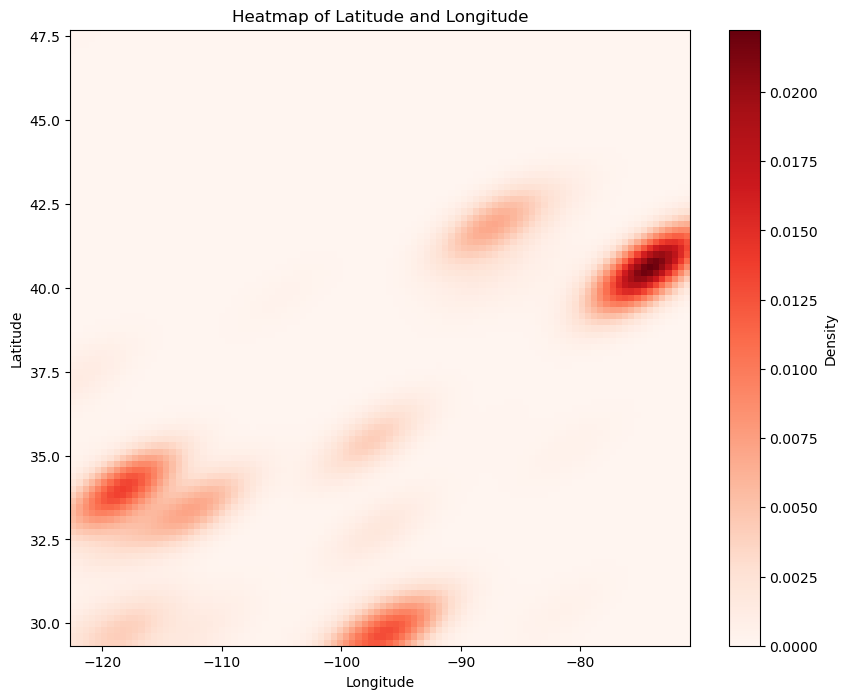

In [15]:
# Extract Latitude and Longitude columns (Columns P and Q)
lat_long_data = data[['Lat', 'Long']].dropna()
x = lat_long_data['Long']
y = lat_long_data['Lat']
k = gaussian_kde([x, y])
xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='Reds')
plt.colorbar(label='Density')
plt.title('Heatmap of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('C:/Users/Cyber/Downloads/heatmap.jpg', dpi=300)
plt.show()


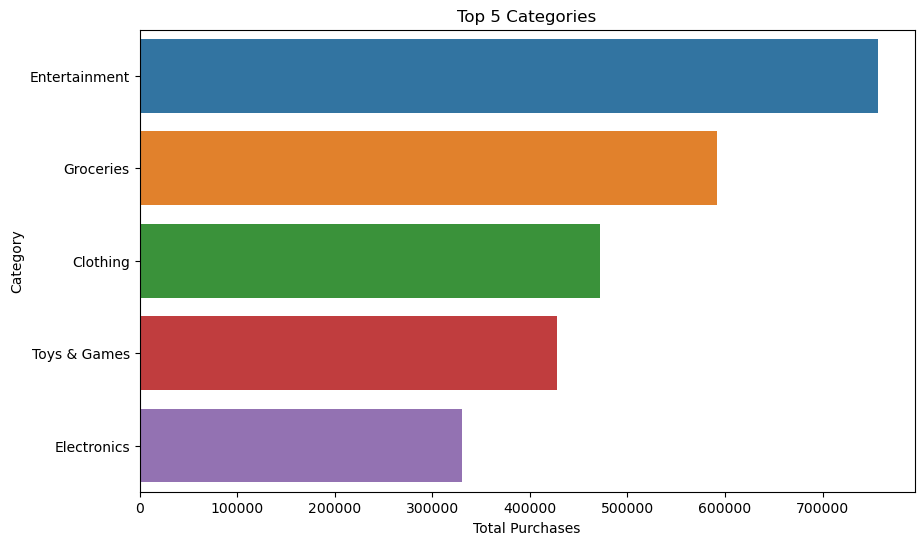

In [20]:
# Define the category columns
category_columns = ['Clothing', 'Electronics', 'Entertainment', 'Groceries', 'Home & Garden', 'Toys & Games', 'Travel']

# Calculate the sum for each category and get the top 5
category_totals = data[category_columns].sum().sort_values(ascending=False).head(5)

# Plot the top 5 categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_totals.values, y=category_totals.index)
plt.title('Top 5 Categories')
plt.xlabel('Total Purchases')
plt.ylabel('Category')
plt.savefig('C:/Users/Cyber/Downloads/top_5_categories.jpg', dpi=300)
plt.show()

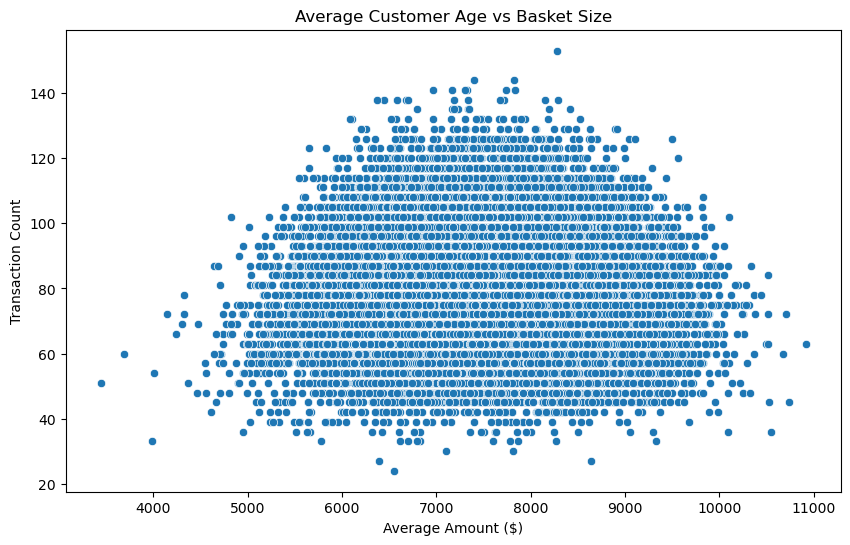

In [22]:
# Scatter plot for AvgAmount vs TransactionCount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['AvgAmount'], y=data['TransactionCount'])
plt.title('Average Customer Age vs Basket Size')
plt.xlabel('Average Amount ($)')
plt.ylabel('Transaction Count')
plt.savefig('C:/Users/Cyber/Downloads/avg_age_vs_basket_size.jpg', dpi=300)
plt.show()